<a href="https://colab.research.google.com/github/Manvi190502/ds_Manvi_Jain/blob/main/notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#datasets
df1=pd.read_csv("fear_greed_index.csv")
df2=pd.read_csv("historical_data.csv")

In [3]:
df1.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [4]:
df1.classification.value_counts()

,count
classification,
Fear,781
Greed,633
Extreme Fear,508
Neutral,396
Extreme Greed,326


In [5]:
df2.tail()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,382.2,420.80,SELL,25-04-2025 15:35,7546.6,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,2124.1,2338.63,SELL,25-04-2025 15:35,7164.4,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,423.4,466.16,SELL,25-04-2025 15:35,5040.3,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,3599.8,3963.38,SELL,25-04-2025 15:35,4616.9,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12
211223,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,1017.1,1119.83,SELL,25-04-2025 15:35,1017.1,Close Long,-53.9063,0xac77fab973c455d77a670422374d9602039800f1f78c...,88803313862,False,0.111982,3.270000e+14,1.750000e+12


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [7]:
df2.dropna(inplace=True)

In [8]:
df2.Direction.value_counts()

,count
Direction,
Open Long,49895
Close Long,48678
Open Short,39741
Close Short,36013
Sell,19902
Buy,16716
Spot Dust Conversion,142
Short > Long,70
Long > Short,57


In [9]:
df2.drop(columns=['Timestamp','Trade ID','Order ID','Transaction Hash','Account'],inplace=True)

In [10]:
df1.drop(columns=['timestamp'],inplace=True)

In [11]:
df2['Timestamp IST'] = pd.to_datetime(df2['Timestamp IST'], format='%d-%m-%Y %H:%M')
df2['Date'] = df2['Timestamp IST'].dt.date
df2.drop(columns=['Timestamp IST'],inplace=True)

In [12]:
df1['datetime'] = pd.to_datetime(df1['date'])
df1['Date'] = df1['datetime'].dt.date
df1.drop(columns=['datetime','date'],inplace=True)

In [13]:
df1.head()

,value,classification,Date
0,30,Fear,2018-02-01
1,15,Extreme Fear,2018-02-02
2,40,Fear,2018-02-03
3,24,Extreme Fear,2018-02-04
4,11,Extreme Fear,2018-02-05


In [14]:
df2.head()

,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Crossed,Fee,Date
0,@107,7.9769,986.87,7872.16,BUY,0.000000,Buy,0.0,True,0.345404,2024-12-02
1,@107,7.9800,16.00,127.68,BUY,986.524596,Buy,0.0,True,0.005600,2024-12-02
2,@107,7.9855,144.09,1150.63,BUY,1002.518996,Buy,0.0,True,0.050431,2024-12-02
3,@107,7.9874,142.98,1142.04,BUY,1146.558564,Buy,0.0,True,0.050043,2024-12-02
4,@107,7.9894,8.73,69.75,BUY,1289.488521,Buy,0.0,True,0.003055,2024-12-02


In [15]:
merged = pd.merge(df2, df1, on='Date', how='left')

In [16]:
merged.head()

,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Crossed,Fee,Date,value,classification
0,@107,7.9769,986.87,7872.16,BUY,0.000000,Buy,0.0,True,0.345404,2024-12-02,80.0,Extreme Greed
1,@107,7.9800,16.00,127.68,BUY,986.524596,Buy,0.0,True,0.005600,2024-12-02,80.0,Extreme Greed
2,@107,7.9855,144.09,1150.63,BUY,1002.518996,Buy,0.0,True,0.050431,2024-12-02,80.0,Extreme Greed
3,@107,7.9874,142.98,1142.04,BUY,1146.558564,Buy,0.0,True,0.050043,2024-12-02,80.0,Extreme Greed
4,@107,7.9894,8.73,69.75,BUY,1289.488521,Buy,0.0,True,0.003055,2024-12-02,80.0,Extreme Greed


In [17]:
merged.dropna(inplace=True)

In [18]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 211218 entries, 0 to 211223
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Coin             211218 non-null  object 
 1   Execution Price  211218 non-null  float64
 2   Size Tokens      211218 non-null  float64
 3   Size USD         211218 non-null  float64
 4   Side             211218 non-null  object 
 5   Start Position   211218 non-null  float64
 6   Direction        211218 non-null  object 
 7   Closed PnL       211218 non-null  float64
 8   Crossed          211218 non-null  bool   
 9   Fee              211218 non-null  float64
 10  Date             211218 non-null  object 
 11  value            211218 non-null  float64
 12  classification   211218 non-null  object 
dtypes: bool(1), float64(7), object(5)
memory usage: 21.2+ MB


##analyzing

In [19]:
grouped = (
    merged.groupby(['classification', 'Side'])
      .agg(
          avg_size_tokens=('Size Tokens', 'mean'),
          avg_size_usd=('Size USD', 'mean')
      )
      .reset_index()
)

print(grouped)

  classification  Side  avg_size_tokens  avg_size_usd
0   Extreme Fear   BUY      1677.202081   5161.502485
1   Extreme Fear  SELL      1674.525778   5546.414885
2  Extreme Greed   BUY      9711.902920   3363.034672
3  Extreme Greed  SELL      8116.925093   2908.231569
4           Fear   BUY      3129.377397   8154.666208
5           Fear  SELL      2861.524377   7491.463987
6          Greed   BUY      5219.626596   6306.490894
7          Greed  SELL      4233.590736   5192.761477
8        Neutral   BUY      3850.388065   3881.410441
9        Neutral  SELL      4923.525252   5696.190011


In [20]:
merged['classification_grouped'] = merged['classification'].replace({
    'Extreme Fear': 'Fear',
    'Extreme Greed': 'Greed'
})

combined = (
    merged.groupby(['classification_grouped', 'Side'])
      .agg(
          avg_size_tokens=('Size Tokens', 'mean'),
          avg_size_usd=('Size USD', 'mean')
      )
      .reset_index()
      .rename(columns={'classification_grouped': 'classification'})
)

print(combined)

  classification  Side  avg_size_tokens  avg_size_usd
0           Fear   BUY      2743.998509   7360.339177
1           Fear  SELL      2565.989062   7007.191555
2          Greed   BUY      7115.182087   5064.473662
3          Greed  SELL      6025.911405   4138.355702
4        Neutral   BUY      3850.388065   3881.410441
5        Neutral  SELL      4923.525252   5696.190011


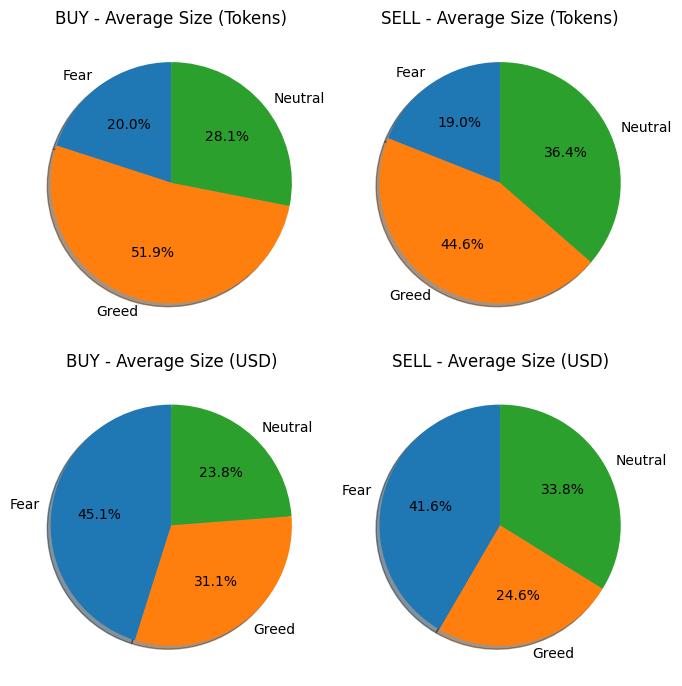

In [21]:
buy_df = combined[combined['Side'] == 'BUY']
sell_df = combined[combined['Side'] == 'SELL']

fig, axes = plt.subplots(2, 2, figsize=(7, 7))


axes[0, 0].pie(
    buy_df['avg_size_tokens'],
    labels=buy_df['classification'],
    autopct='%1.1f%%',
    startangle=90,
    shadow=True
)
axes[0, 0].set_title('BUY - Average Size (Tokens)')


axes[0, 1].pie(
    sell_df['avg_size_tokens'],
    labels=sell_df['classification'],
    autopct='%1.1f%%',
    startangle=90,
    shadow=True
)
axes[0, 1].set_title('SELL - Average Size (Tokens)')


axes[1, 0].pie(
    buy_df['avg_size_usd'],
    labels=buy_df['classification'],
    autopct='%1.1f%%',
    startangle=90,
    shadow=True
)
axes[1, 0].set_title('BUY - Average Size (USD)')


axes[1, 1].pie(
    sell_df['avg_size_usd'],
    labels=sell_df['classification'],
    autopct='%1.1f%%',
    startangle=90,
    shadow=True
)
axes[1, 1].set_title('SELL - Average Size (USD)')

plt.tight_layout()
plt.savefig("sentiment_trade_analysis.png", dpi=300, bbox_inches='tight')
plt.show()


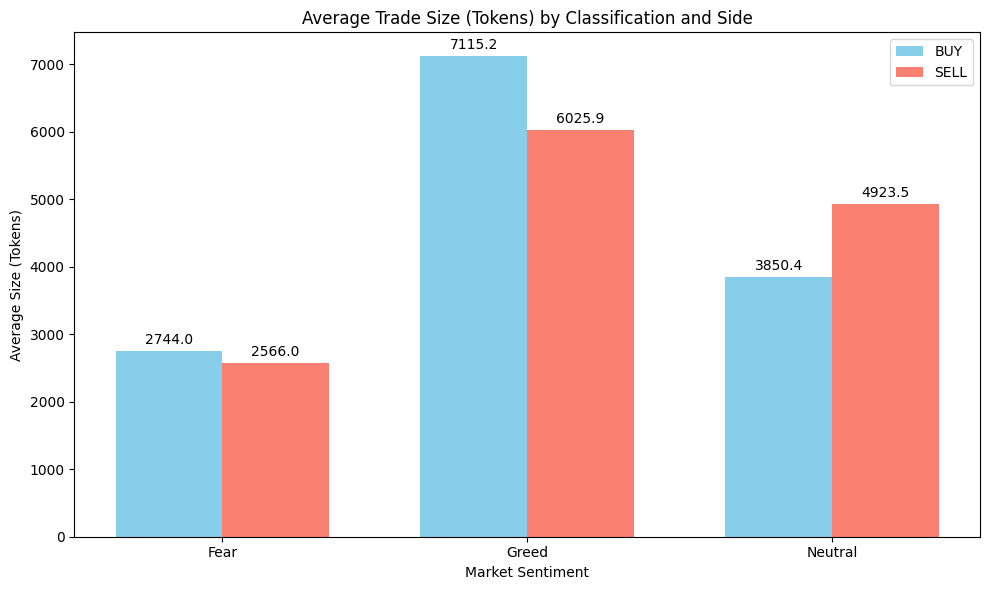

In [22]:
import matplotlib.pyplot as plt
import numpy as np


categories = combined['classification'].unique()
x = np.arange(len(categories))

width = 0.35

buy_values = combined[combined['Side'] == 'BUY']['avg_size_tokens'].values
sell_values = combined[combined['Side'] == 'SELL']['avg_size_tokens'].values

fig, ax = plt.subplots(figsize=(10,6))

rects1 = ax.bar(x - width/2, buy_values, width, label='BUY', color='skyblue')
rects2 = ax.bar(x + width/2, sell_values, width, label='SELL', color='salmon')


ax.set_xlabel('Market Sentiment')
ax.set_ylabel('Average Size (Tokens)')
ax.set_title('Average Trade Size (Tokens) by Classification and Side')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()


def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}',
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0,3),
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)

plt.tight_layout()
plt.savefig("average trade size(tokens) by classification and side.png", dpi=300, bbox_inches='tight')
plt.show()


In [23]:
#2.

combined1 = (
    merged.groupby(['Side'])
      .agg(
          avg_size_tokens=('Size Tokens', 'mean'),
          avg_size_usd=('Size USD', 'mean')
      )
      .reset_index()
)

print(combined1)

   Side  avg_size_tokens  avg_size_usd
0   BUY      4758.141507   5767.167325
1  SELL      4495.791827   5518.100038


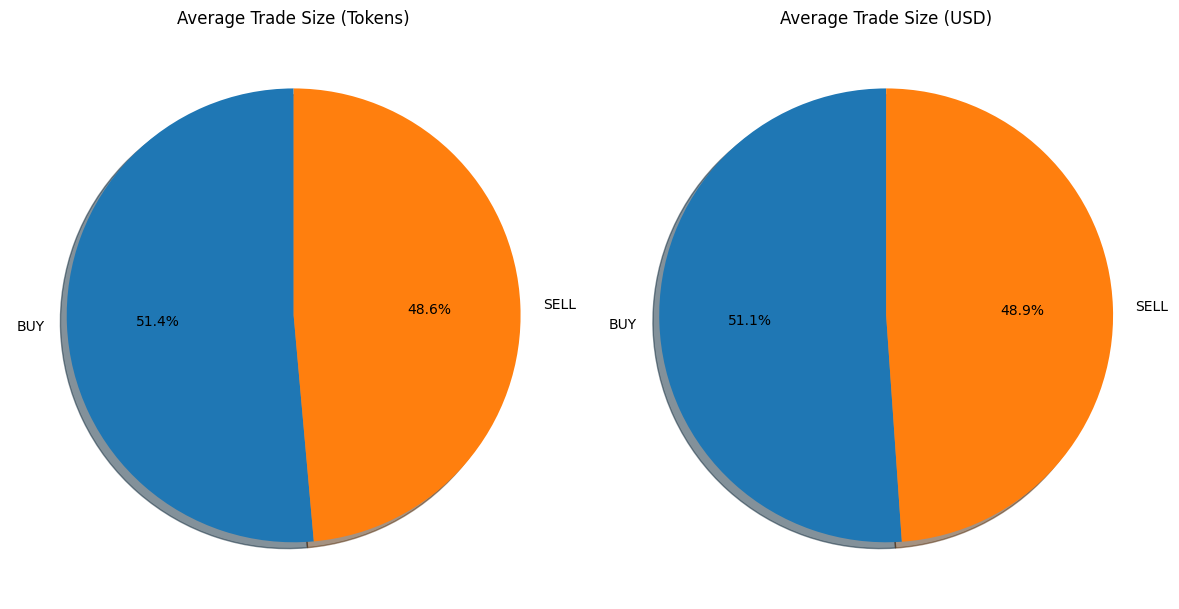

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))


axes[0].pie(
    combined1['avg_size_tokens'],
    labels=combined1['Side'],
    autopct='%1.1f%%',
    startangle=90,
    shadow=True
)
axes[0].set_title('Average Trade Size (Tokens)')


axes[1].pie(
    combined1['avg_size_usd'],
    labels=combined1['Side'],
    autopct='%1.1f%%',
    startangle=90,
    shadow=True
)
axes[1].set_title('Average Trade Size (USD)')

plt.tight_layout()


plt.savefig("avg_trade_size_by_side.png", dpi=300, bbox_inches='tight')


plt.show()

In [25]:
#Average Closed PnL per Sentiment and Side
pnl_stats = merged.groupby(['classification', 'Side'])['Closed PnL'].mean().reset_index()
print(pnl_stats)


  classification  Side  Closed PnL
0   Extreme Fear   BUY   34.114627
1   Extreme Fear  SELL   34.980106
2  Extreme Greed   BUY   10.498927
3  Extreme Greed  SELL  114.584643
4           Fear   BUY   63.927104
5           Fear  SELL   45.049641
6          Greed   BUY   25.002302
7          Greed  SELL   59.691091
8        Neutral   BUY   29.227429
9        Neutral  SELL   39.456408


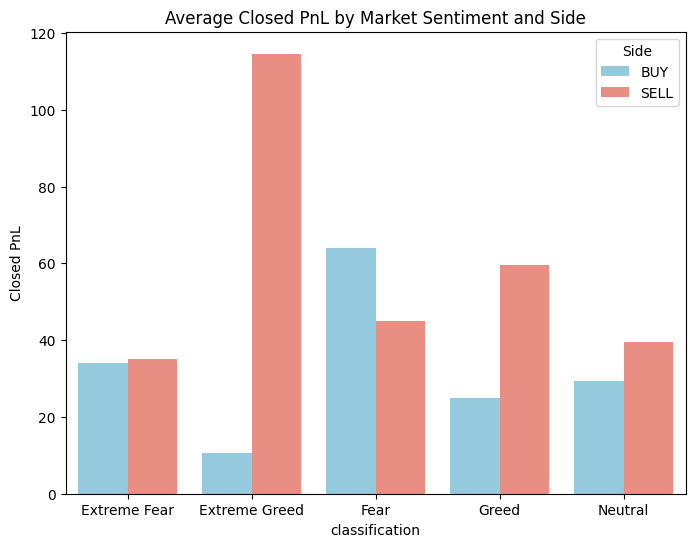

In [26]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.barplot(data=pnl_stats, x='classification', y='Closed PnL', hue='Side', palette=['skyblue','salmon'])
plt.title('Average Closed PnL by Market Sentiment and Side')
plt.savefig("Average Closed PnL by Market Sentiment and Side.png", dpi=300, bbox_inches='tight')
plt.show()


In [27]:
#Number of trades per classification and side
trade_count = merged.groupby(['classification', 'Side']).size().reset_index(name='Trade Count')
print(trade_count)


  classification  Side  Trade Count
0   Extreme Fear   BUY        10935
1   Extreme Fear  SELL        10465
2  Extreme Greed   BUY        17940
3  Extreme Greed  SELL        22052
4           Fear   BUY        30270
5           Fear  SELL        31567
6          Greed   BUY        24576
7          Greed  SELL        25727
8        Neutral   BUY        18969
9        Neutral  SELL        18717


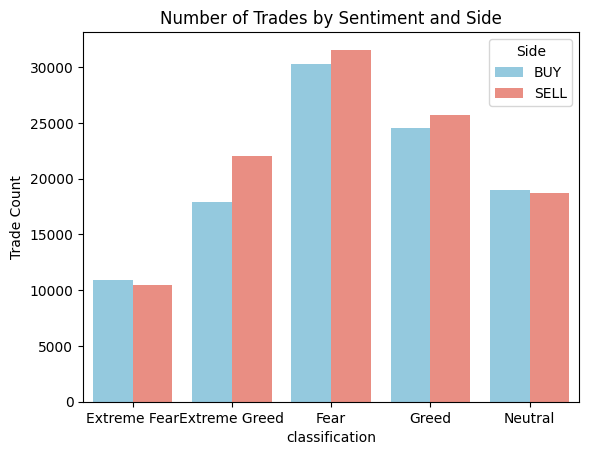

In [28]:
sns.barplot(data=trade_count, x='classification', y='Trade Count', hue='Side', palette=['skyblue','salmon'])
plt.title('Number of Trades by Sentiment and Side')
plt.savefig("Number of Trades by Sentiment and Side.png", dpi=300, bbox_inches='tight')
plt.show()


                value  Size Tokens  Size USD  Closed PnL
value        1.000000     0.023080 -0.029843    0.008121
Size Tokens  0.023080     1.000000  0.013310    0.005067
Size USD    -0.029843     0.013310  1.000000    0.123645
Closed PnL   0.008121     0.005067  0.123645    1.000000


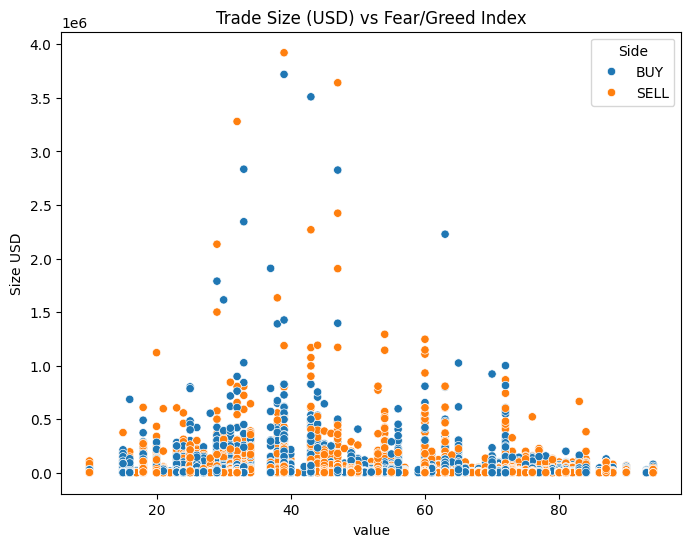

In [29]:
#Correlation between sentiment value and trade size
correlation = merged[['value', 'Size Tokens', 'Size USD', 'Closed PnL']].corr()
print(correlation)
plt.figure(figsize=(8,6))
sns.scatterplot(data=merged, x='value', y='Size USD', hue='Side')
plt.title('Trade Size (USD) vs Fear/Greed Index')
plt.savefig("Trade_Size_USD_vs_Fear_Greed_Index.png", dpi=300, bbox_inches='tight')
plt.show()


   classification                  Direction  Count
0    Extreme Fear                        Buy    807
1    Extreme Fear                 Close Long   6241
2    Extreme Fear                Close Short   3117
3    Extreme Fear               Long > Short      5
4    Extreme Fear                  Open Long   7005
5    Extreme Fear                 Open Short   3174
6    Extreme Fear                       Sell   1042
7    Extreme Fear               Short > Long      6
8    Extreme Fear       Spot Dust Conversion      3
9   Extreme Greed                        Buy   5132
10  Extreme Greed                 Close Long   7186
11  Extreme Greed                Close Short   6497
12  Extreme Greed               Long > Short      7
13  Extreme Greed                  Open Long   6300
14  Extreme Greed                 Open Short   7663
15  Extreme Greed                       Sell   7164
16  Extreme Greed               Short > Long     11
17  Extreme Greed       Spot Dust Conversion     32
18          

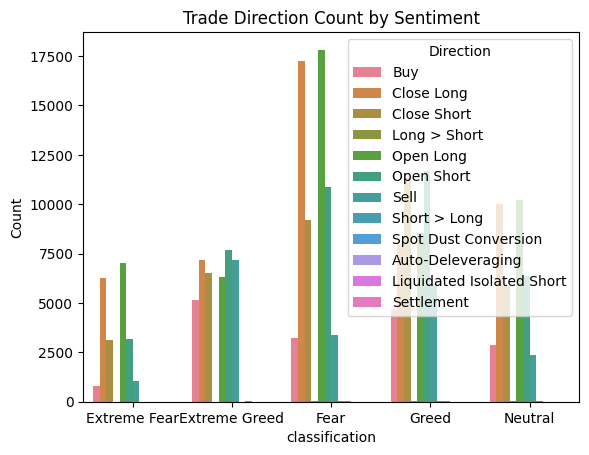

In [30]:
#Count of trade directions per sentiment
direction_count = merged.groupby(['classification', 'Direction']).size().reset_index(name='Count')
print(direction_count)
sns.barplot(data=direction_count, x='classification', y='Count', hue='Direction')
plt.title('Trade Direction Count by Sentiment')
plt.savefig("Trade Direction Count by Sentiment.png", dpi=300, bbox_inches='tight')
plt.show()


  classification  Side       Fee
0   Extreme Fear   BUY  1.020198
1   Extreme Fear  SELL  1.216701
2  Extreme Greed   BUY  0.719446
3  Extreme Greed  SELL  0.640477
4           Fear   BUY  1.501250
5           Fear  SELL  1.489343
6          Greed   BUY  1.426244
7          Greed  SELL  1.090190
8        Neutral   BUY  0.868070
9        Neutral  SELL  1.223906


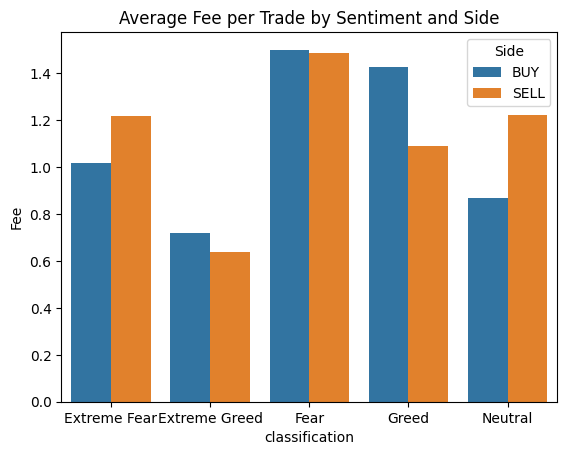

In [31]:
#Average fee per trade per sentiment
fee_stats = merged.groupby(['classification', 'Side'])['Fee'].mean().reset_index()
print(fee_stats)
sns.barplot(data=fee_stats, x='classification', y='Fee', hue='Side')
plt.title('Average Fee per Trade by Sentiment and Side')
plt.savefig("Average Fee per Trade by Sentiment and Side.png", dpi=300, bbox_inches='tight')
plt.show()


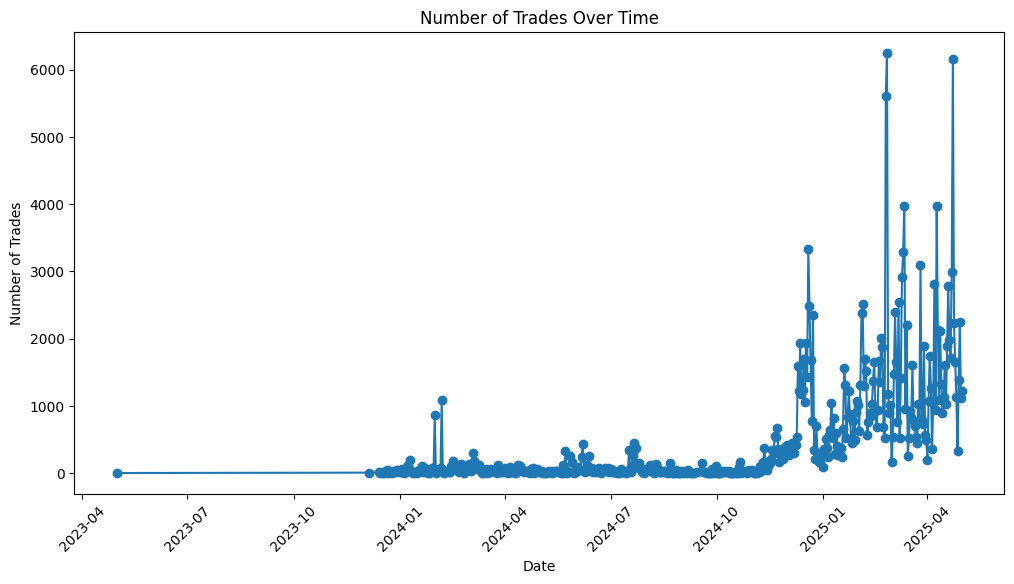

In [32]:
#Number of trades per day
daily_trades = merged.groupby('Date').size().reset_index(name='Trade Count')
plt.figure(figsize=(12,6))
plt.plot(daily_trades['Date'], daily_trades['Trade Count'], marker='o')
plt.title('Number of Trades Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Trades')
plt.xticks(rotation=45)
plt.savefig("Number of Trades Over Time.png", dpi=300, bbox_inches='tight')
plt.show()


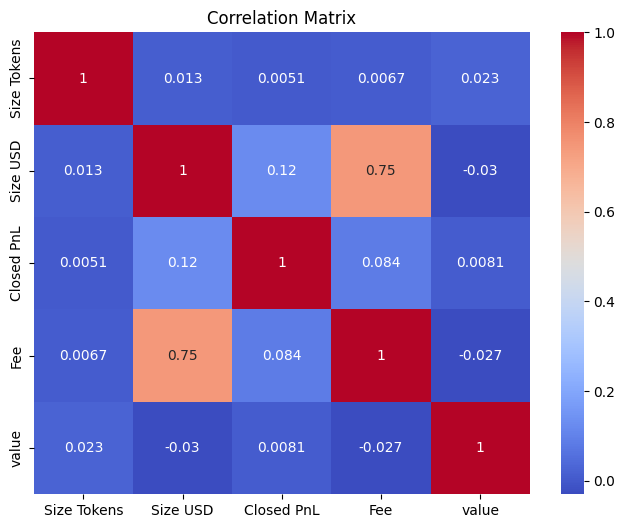

In [33]:
plt.figure(figsize=(8,6))
sns.heatmap(merged[['Size Tokens','Size USD','Closed PnL','Fee','value']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig("Correlation Matrix.png", dpi=300, bbox_inches='tight')
plt.show()


Side                  BUY        SELL
classification                       
Extreme Fear    34.114627   34.980106
Extreme Greed   10.498927  114.584643
Fear            63.927104   45.049641
Greed           25.002302   59.691091
Neutral         29.227429   39.456408


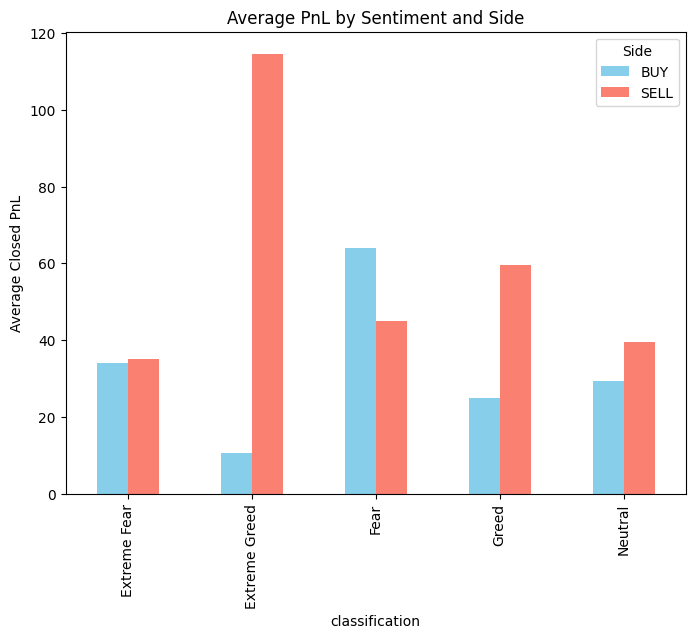

In [34]:
strategy = merged.groupby(['classification', 'Side'])['Closed PnL'].mean().unstack()
print(strategy)
strategy.plot(kind='bar', figsize=(8,6), color=['skyblue','salmon'])
plt.title('Average PnL by Sentiment and Side')
plt.ylabel('Average Closed PnL')
plt.savefig("Average PnL by Sentiment and Side.png", dpi=300, bbox_inches='tight')
plt.show()


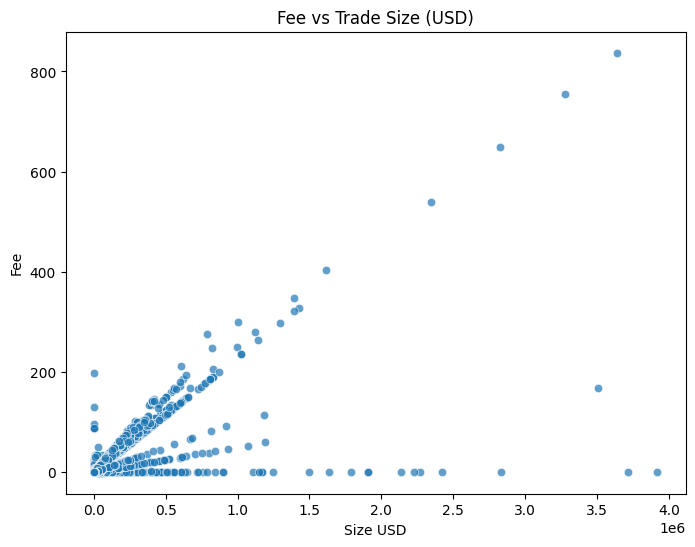

In [35]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=merged, x='Size USD', y='Fee', alpha=0.7)
plt.title('Fee vs Trade Size (USD)')
plt.xlabel('Size USD')
plt.ylabel('Fee')
plt.savefig("Fee vs Trade Size (USD).png", dpi=300, bbox_inches='tight')
plt.show()


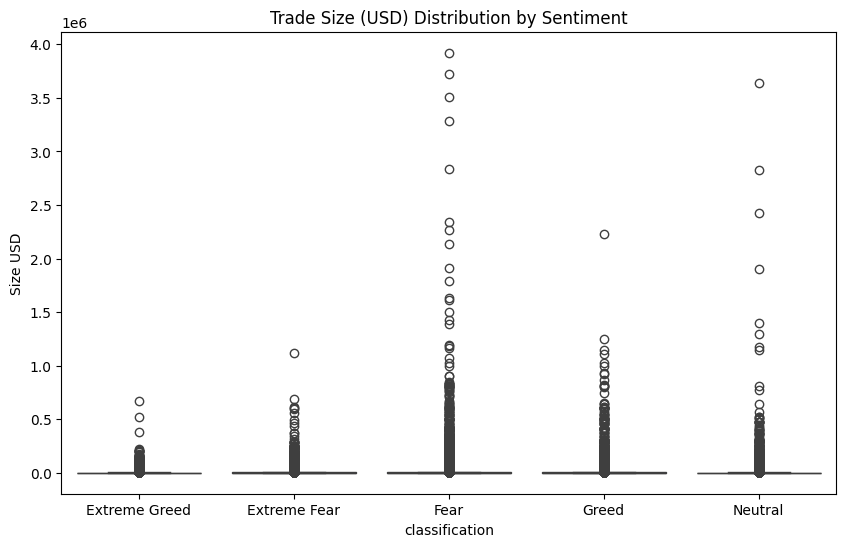

In [36]:
#Trade Size vs Market Sentiment
plt.figure(figsize=(10,6))
sns.boxplot(data=merged, x='classification', y='Size USD')
plt.title('Trade Size (USD) Distribution by Sentiment')
plt.savefig("Trade Size (USD) Distribution by Sentiment.png", dpi=300, bbox_inches='tight')
plt.show()


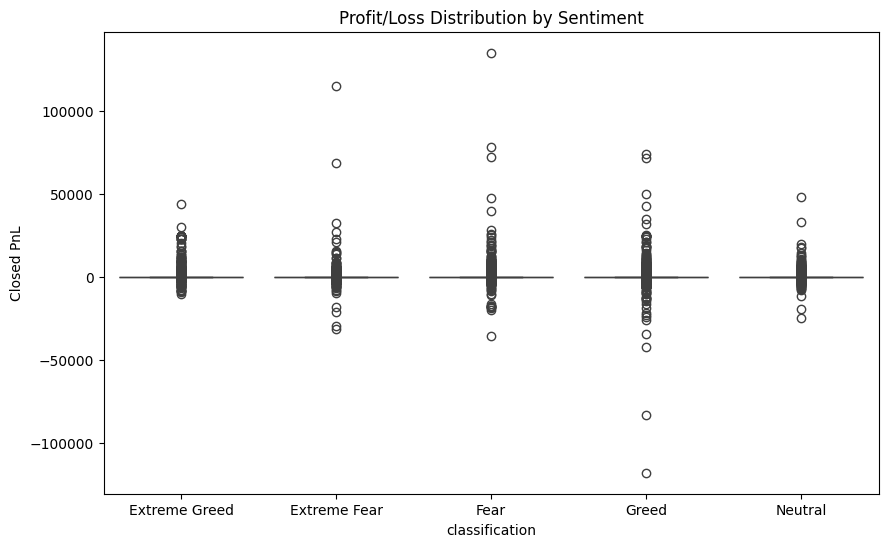

In [37]:
#Profitability (Closed PnL) vs Market Sentiment
plt.figure(figsize=(10,6))
sns.boxplot(data=merged, x='classification', y='Closed PnL')
plt.title('Profit/Loss Distribution by Sentiment')
plt.savefig("Profit_Loss Distribution by Sentiment.png", dpi=300, bbox_inches='tight')
plt.show()

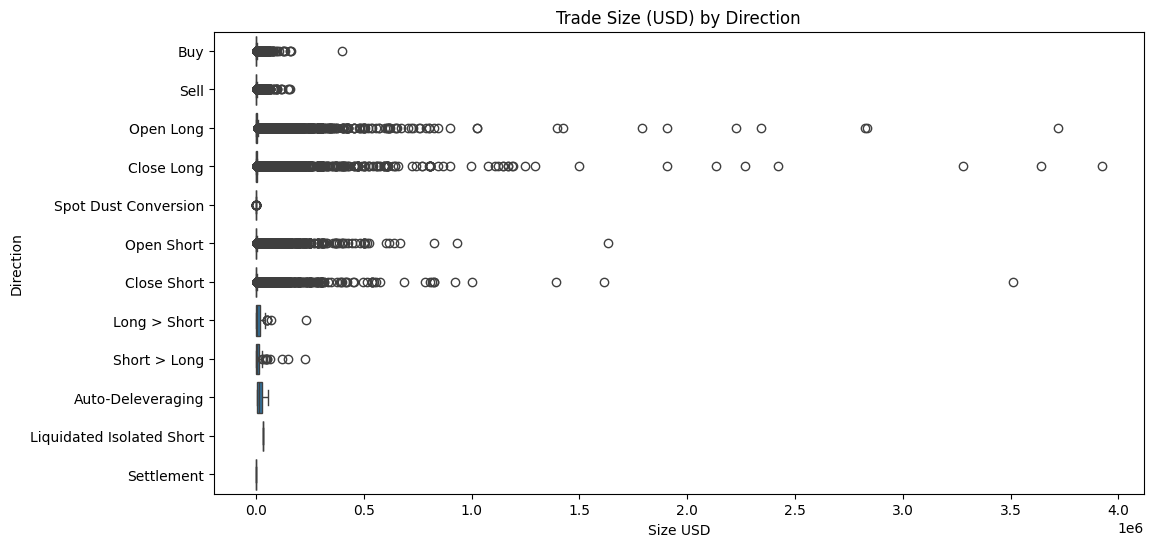

In [38]:
#Trade Size vs Direction
plt.figure(figsize=(12,6))
sns.boxplot(data=merged, y='Direction', x='Size USD')
plt.title('Trade Size (USD) by Direction')
plt.savefig("Trade Size_USD_ by Direction.png", dpi=300, bbox_inches='tight')
plt.show()

In [40]:
l=["sentiment_trade_analysis","average trade size(tokens) by classification and side","avg_trade_size_by_side","Average Closed PnL by Market Sentiment and Side","Number of Trades by Sentiment and Side","Trade_Size_USD_vs_Fear_Greed_Index","Trade Direction Count by Sentiment","Average Fee per Trade by Sentiment and Side","Number of Trades Over Time","Correlation Matrix","Average PnL by Sentiment and Side","Fee vs Trade Size (USD)","Trade Size (USD) Distribution by Sentiment","Profit_Loss Distribution by Sentiment","Trade Size_USD_ by Direction"]
for name in l:
    files.download(f"{name}.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>